*The key goal of the analysis is to measure the campaign performance by exercising statistical , predictive modeling and clustering techniques centric to brand awareness, generating leads and boosting sales*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv( "C:/Users/Kalpitha/OneDrive/Desktop/Portfolio projects/marketing_and_product_performance.csv")
print(data.head())

  Campaign_ID   Product_ID    Budget  Clicks  Conversions  Revenue_Generated  \
0  CMP_RLSDVN  PROD_HBJFA3  41770.45    4946           73           15520.09   
1  CMP_JHHUE9  PROD_OE8YNJ  29900.93     570          510           30866.17   
2  CMP_6SBOWN  PROD_4V8A08  22367.45    3546          265           32585.62   
3  CMP_Q31QCU  PROD_A1Q6ZB  29957.54    2573          781           95740.12   
4  CMP_AY0UTJ  PROD_F57N66  36277.19     818           79           81990.43   

    ROI  Customer_ID Subscription_Tier  Subscription_Length Flash_Sale_ID  \
0  1.94  CUST_1K7G39           Premium                    4  FLASH_1VFK5K   
1  0.76  CUST_0DWS6F           Premium                    4  FLASH_1M6COK   
2  1.41  CUST_BR2GST             Basic                    9  FLASH_J4PEON   
3  3.32  CUST_6TBY6K           Premium                   32  FLASH_1TOVXT   
4  3.53  CUST_XASI45          Standard                   29  FLASH_AOBHXL   

   Discount_Level  Units_Sold    Bundle_ID  Bundle_Price

In [4]:
data.describe()

,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Length,Discount_Level,Units_Sold,Bundle_Price,Customer_Satisfaction_Post_Refund
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25263.607524,2481.903600,498.978700,50038.627579,2.756365,18.016500,39.421000,100.689600,275.198346,2.500900
std,14350.085927,1435.973623,289.479495,28545.702337,1.296901,10.149666,17.212925,57.074015,129.218710,1.113249
min,500.440000,10.000000,1.000000,1002.080000,0.500000,1.000000,10.000000,1.000000,50.010000,1.000000
25%,12789.190000,1225.750000,247.000000,25264.255000,1.630000,9.000000,24.000000,52.000000,165.717500,2.000000
50%,25030.170000,2451.000000,499.000000,49513.815000,2.750000,18.000000,39.000000,101.000000,272.555000,2.000000
75%,37921.725000,3723.000000,751.000000,74507.157500,3.890000,27.000000,54.000000,150.000000,387.322500,3.000000
max,49999.630000,4999.000000,999.000000,99999.470000,5.000000,35.000000,69.000000,199.000000,499.970000,4.000000




*Quartile analysis*|

In [5]:
quartiles= data['Revenue_Generated'].quantile([0.25, 0.50,0.75])
print(quartiles)

0.25    25264.2550
0.50    49513.8150
0.75    74507.1575
Name: Revenue_Generated, dtype: float64


According to the quartile information, Q1 cut-off is 25,264 ; median is 49,513 and Q3 cut-off is 74,507. Using this the 'bottom 25' and 'top 25' dataframes shall be figured to drive the analysis on comparisons 

Subsetting the data

In [6]:
q1_cutoff = quartiles.loc[0.25]
q3_cutoff = quartiles.loc[0.75]

bottom25 = data[data['Revenue_Generated'] <= q1_cutoff].copy()
top25    = data[data['Revenue_Generated'] >= q3_cutoff].copy()

print("Bottom 25% Summary:")
print(bottom25.describe())

print("\nTop 25% Summary:")
print(top25.describe())



Bottom 25% Summary:
            Budget       Clicks  Conversions  Revenue_Generated          ROI  \
count   2500.00000  2500.000000  2500.000000        2500.000000  2500.000000   
mean   25713.02048  2485.364800   496.451600       13281.928188     2.740948   
std    14437.24999  1439.333985   287.873821        6869.718565     1.310496   
min      503.04000    10.000000     1.000000        1002.080000     0.500000   
25%    13078.93750  1239.750000   247.000000        7511.247500     1.610000   
50%    25905.17000  2467.500000   497.000000       13345.060000     2.720000   
75%    38475.96750  3744.250000   743.000000       19164.092500     3.900000   
max    49984.36000  4998.000000   999.000000       25259.680000     5.000000   

       Subscription_Length  Discount_Level   Units_Sold  Bundle_Price  \
count          2500.000000     2500.000000  2500.000000   2500.000000   
mean             17.859200       39.248800   100.169200    275.795756   
std              10.132228       17.2810

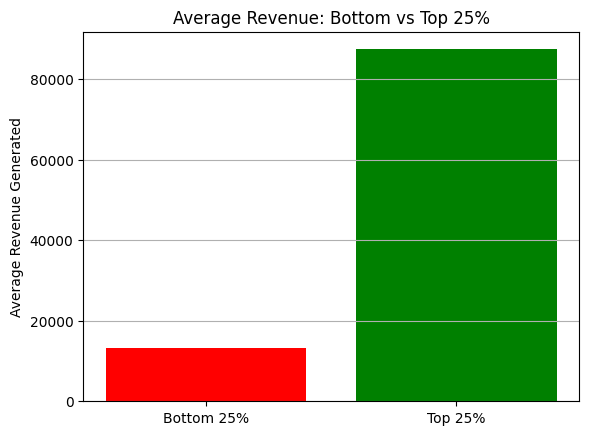

In [7]:
# Histogram comparison

avg_bottom = bottom25['Revenue_Generated'].mean()
avg_top = top25['Revenue_Generated'].mean()

# Bar chart
plt.bar(['Bottom 25%', 'Top 25%'], [avg_bottom, avg_top], color=['red', 'green'])
plt.title('Average Revenue: Bottom vs Top 25%')
plt.ylabel('Average Revenue Generated')
plt.grid(axis='y')
plt.show()

Deriving comparisons with other features to draw analysis on the reason why the top 25% has better revenue generation 

***Feature standardisation***

Performing z-score standardisation to make all the numerical values have a mean of 0 and standard deviation of 1

In [9]:

# Calculating derived metrics
data['CR'] = data['Conversions'] / data['Clicks']
data['Revenue_per_Budget'] = data['Revenue_Generated'] / data['Budget']
data['CPC'] = data['Budget'] / data['Conversions']

# Print each metric separately with clear labels
print("\n--- Conversion Rate (CR) ---")
print(data['CR'].describe())

print("\n--- Revenue per Budget ---")
print(data['Revenue_per_Budget'].describe())

print("\n--- Cost per conversion (CPC) ---")
print(data['CPC'].describe())



--- Conversion Rate (CR) ---
count    10000.000000
mean         0.609758
std          2.322292
min          0.000204
25%          0.099834
50%          0.201990
75%          0.401150
max         64.933333
Name: CR, dtype: float64

--- Revenue per Budget ---
count    10000.000000
mean         4.666325
std         10.113065
min          0.020675
25%          0.992535
50%          1.967545
75%          3.940290
max        184.444458
Name: Revenue_per_Budget, dtype: float64

--- Cost per conversion (CPC) ---
count    10000.000000
mean       188.644651
std       1099.360829
min          0.570034
25%         25.520194
50%         50.539639
75%        102.627482
max      48805.150000
Name: CPC, dtype: float64


Subsetting top and bottom 25 again after calculating derived metrices

In [10]:
top25 = data.nlargest(25, 'Revenue_Generated')
bottom25 = data.nsmallest(25, 'Revenue_Generated')
print(top25.head())

print("\n" )
print(bottom25.head())


     Campaign_ID   Product_ID    Budget  Clicks  Conversions  \
1629  CMP_QL4ACK  PROD_YWCQ5B  23408.73     137          271   
9524  CMP_T6578B  PROD_OEWJUT  36038.44    2416          137   
4052  CMP_KJHPXL  PROD_8JEJ8V  10885.17     953          676   
5078  CMP_055BQ3  PROD_XETFB1  22841.33    4429          696   
5968  CMP_XRPO8L  PROD_CAG26A   4772.15    2292          745   

      Revenue_Generated   ROI  Customer_ID Subscription_Tier  \
1629           99999.47  0.80  CUST_BCB4T1           Premium   
9524           99995.06  3.71  CUST_N31Y4W             Basic   
4052           99980.64  1.62  CUST_0LP6Y8             Basic   
5078           99958.93  1.79  CUST_Z1F7IO          Standard   
5968           99931.65  3.87  CUST_PU5BKZ           Premium   

      Subscription_Length Flash_Sale_ID  Discount_Level  Units_Sold  \
1629                   27  FLASH_QO2Y49              66           6   
9524                   11  FLASH_3POFCK              19          53   
4052             

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
#listing numerical features in a dataframe 

numerical_df = [
    'Budget', 'Clicks', 'Conversions', 'Revenue_Generated',
    'ROI', 'Units_Sold', 'Subscription_Length',
    'Customer_Satisfaction_Post_Refund', 'Bundle_Price', 'Discount_Level', 'CR', 'Revenue_per_Budget','CPC' 
]

#Applying Z-score normalization
scaler = StandardScaler()
data[numerical_df] = scaler.fit_transform(data[numerical_df])

print(data[numerical_df] .head())


     Budget    Clicks  Conversions  Revenue_Generated       ROI  Units_Sold  \
0  1.150353  1.716062    -1.471607          -1.209298 -0.629505   -1.168534   
1  0.323173 -1.331500     0.038075          -0.671674 -1.539412   -0.064649   
2 -0.201832  0.741065    -0.808314          -0.611436 -1.038192    1.039236   
3  0.327118  0.063442     0.974285           1.601074  0.434623    1.021714   
4  0.767531 -1.158786    -1.450879           1.119377  0.596556   -0.853138   

   Subscription_Length  Customer_Satisfaction_Post_Refund  Bundle_Price  \
0            -1.381050                           1.346666      1.227451   
1            -1.381050                          -0.449967      0.109058   
2            -0.888399                           1.346666      1.452429   
3             1.377799                          -1.348283      0.456316   
4             1.082208                          -0.449967      0.746614   

   Discount_Level        CR  Revenue_per_Budget       CPC  
0        0.207

Interpreting the campaign parameters between top25 and bottom25 (grouped by revenue) to analyse which parameters are different (and potentially better) in the top 25,

In [14]:
from scipy.stats import ttest_ind

In [15]:
#conversion rate 
t_stat, p_val = ttest_ind(top25['CR'], bottom25['CR'], nan_policy='omit')
print(f"t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

t-statistic: 1.01, p-value: 0.3168


This means there is no statistically significant difference between the means of this metric

In [16]:
#return on spend
t_stat, p_val = ttest_ind(top25['Revenue_per_Budget'], bottom25['Revenue_per_Budget'], nan_policy='omit')
print(f"t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

t-statistic: 3.30, p-value: 0.0018


This difference is not statistically significant 

In [17]:
#cost per conversion
t_stat, p_val = ttest_ind(top25['CPC'], bottom25['CPC'], nan_policy='omit')
print(f"t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

t-statistic: -0.24, p-value: 0.8108


There is no statistically significant difference in "cost per conversion" between top 25 and bottom 25 campaigns

In [25]:
# For each metric:
t_stat, p_val = ttest_ind(top25['Budget'], bottom25['Budget'], nan_policy='omit')
print(f"t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

t-statistic: -1.35, p-value: 0.1848


There is no statistically significant difference in the average budget between top 25 and bottom 25 campaigns

In [26]:

t_stat, p_val = ttest_ind(top25['ROI'], bottom25['ROI'], nan_policy='omit')
print(f"t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

t-statistic: 1.63, p-value: 0.1094


There is no statistically significant difference in ROI between top 25 and bottom 25 campaigns

In [27]:

t_stat, p_val = ttest_ind(top25['Customer_Satisfaction_Post_Refund'], bottom25['Customer_Satisfaction_Post_Refund'], nan_policy='omit')
print(f"t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

t-statistic: 0.12, p-value: 0.9075


There is no meaningful or statistically significant difference in customer satisfaction post refund between  top and bottom revenue campaigns.

**Running cluster analysis on all campigns to check where the top25 and bottom25 fall**

In [29]:
from sklearn.cluster import KMeans

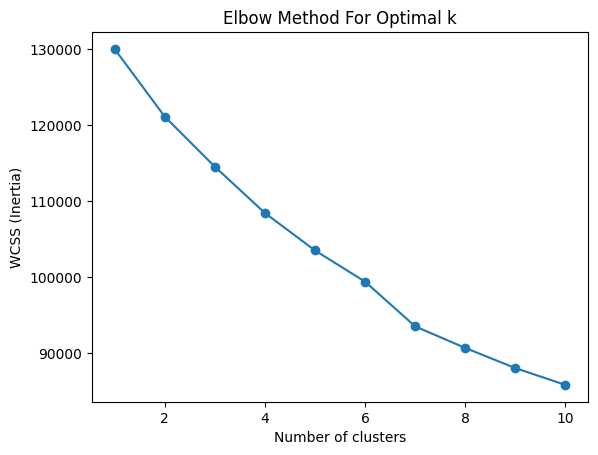

In [58]:

x= data[numerical_df]
wcss = []
max_clusters = min(10, len(x)) 

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)  
    wcss.append(kmeans.inertia_)

plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()


In [64]:
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
cluster_labels = kmeans.fit_predict(x)
x['cluster'] = cluster_labels

C:\Users\Kalpitha\AppData\Local\Temp\ipykernel_3888\42713146.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster'] = cluster_labels


In [60]:
data['cluster'] = cluster_labels


In [61]:
cluster_profiles = data.groupby('cluster').mean(numeric_only=True)
print(cluster_profiles)


          Budget    Clicks  Conversions  Revenue_Generated       ROI  \
cluster                                                                
0       -0.98733  0.062557     0.085894           0.207743 -0.044921   
1        0.68784 -0.044253    -0.056429          -0.144619  0.030436   
2        0.53561  0.295410    -1.718614          -0.165872  0.445547   

         Subscription_Length  Discount_Level  Units_Sold  Bundle_Price  \
cluster                                                                  
0                   0.061909        0.003097   -0.030527     -0.001259   
1                  -0.042291       -0.002170    0.021323      0.000717   
2                  -0.445012        0.004590   -0.010623      0.079133   

         Customer_Satisfaction_Post_Refund        CR  Revenue_per_Budget  \
cluster                                                                    
0                                 0.009805 -0.058833            0.470927   
1                                -0.0056

In [62]:
data['performance_group'] = 'Other'
data.loc[data['Campaign_ID'].isin(top25['Campaign_ID']), 'performance_group'] = 'Top 25'
data.loc[data['Campaign_ID'].isin(bottom25['Campaign_ID']), 'performance_group'] = 'Bottom 25'

print(pd.crosstab(data['cluster'], data['performance_group']))


performance_group  Bottom 25  Other  Top 25
cluster                                    
0                          8   4080      17
1                         17   5858       8
2                          0     12       0


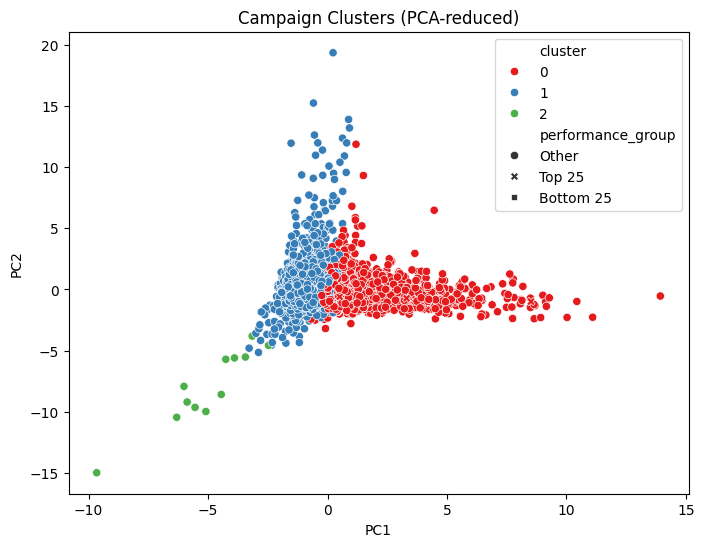

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(x.drop('cluster', axis=1))  # exclude cluster column for PCA
data['PC1'] = components[:, 0]
data['PC2'] = components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', style='performance_group', data=data, palette='Set1')
plt.title('Campaign Clusters (PCA-reduced)')
plt.show()
